# $D^0$ lifetime task

## Introduction

In this assignment we will try to measure the lifetime of the $D^0$ meson.
This meson contains a charm quark and an anti up quark $(c\bar{u})$. When it decays, the most likely process is the charm quark decaying into a strange quark plus a up and anti-down $(c\rightarrow su\bar{d})$. This is mediated by the weak force, and means the meson survives longer than particles that can decay via the electromagnetic or strong forces. 


The data sample we will use for this assignment was taken by the LHCb experiment using collisions between two beams of protons. We will only look at a very small fraction of the total sample. When the $D^0$ mesons are produced at the LHC they will be traveling relativistically. As a result of time-dilation the distance they typically travel before decaying can be as much as a few millimeters even though their life time is on the order of picoseconds. Most particles produced in proton-proton collisions are emitted directly from the point of the collision (primary vertex), therefore we can use the position of the $D^{0}$ decay (secondary vertex) to help disentagle them from the many other particles produced in the collision.

Notes:
- All momentums are given in units of ${\rm MeV}$ and distances in $\rm mm$.


## Part 1: Reading in the data

To begin with we will download the data set and access the information we will need.
This file contains around 100,000 $D^0\rightarrow K^{-} \pi^{+}$ decays.

The file contains:
- the 3 components of momentum for the kaon and pion,
- the position of the proton-proton collision (primary vertex),
- the position of the $D^0$ decay (secondary vertex).

In [1]:
import monashspa
import uproot4 as uproot
import matplotlib.pyplot as plt
import numpy as np
import math
from monashspa.common.download_gdrive import download_file_from_google_drive

## define constants
const_c  = 2.99792e8 * 1e3 * 1e-12 ## in units mm/ps

In [2]:
## Download the data
download_file_from_google_drive('1sJI2nsJGmCu52xvpqCaijYQlDyqGA2b7','Data_small.root')

## Access the information we need
file = uproot.open("Data_small.root")
tree = file["RS_LTUNB"]

## momentum
K_PX  = tree["P1_PX"].array(library="np")
Pi_PX = tree["P2_PX"].array(library="np")

K_PY  = tree["P1_PY"].array(library="np")
Pi_PY = tree["P2_PY"].array(library="np")

K_PZ  = tree["P1_PZ"].array(library="np")
Pi_PZ = tree["P2_PZ"].array(library="np")

## secondary vertex position
D0_X = tree["D0_ENDVERTEX_X"].array(library="np")
D0_Y = tree["D0_ENDVERTEX_Y"].array(library="np")
D0_Z = tree["D0_ENDVERTEX_Z"].array(library="np")

## primary vertex position
PV_X = tree["D0_OWNPV_X"].array(library="np")
PV_Y = tree["D0_OWNPV_Y"].array(library="np")
PV_Z = tree["D0_OWNPV_Z"].array(library="np")

## Calculate transverse momentum
K_PT  = np.sqrt(K_PX**2 +K_PY**2)
Pi_PT = np.sqrt(Pi_PX**2+Pi_PY**2)

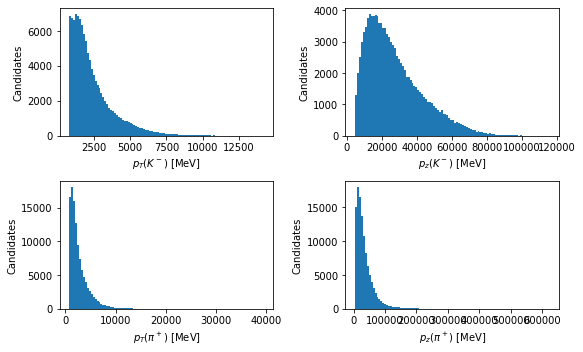

In [3]:
## Lets try plotting the momentum of the kaon and pion
fig, ax = plt.subplots(2, 2,figsize=(8,5))
ax[0,0].hist(K_PT,bins=100,label="K_PT")
ax[0,0].set_xlabel('$p_{T}(K^-)$ [MeV]')
ax[0,0].set_ylabel('Candidates')

ax[0,1].hist(K_PZ,bins=100)
ax[0,1].set_xlabel('$p_{z}(K^-)$ [MeV]')
ax[0,1].set_ylabel('Candidates')

ax[1,0].hist(Pi_PT,bins=100)
ax[1,0].set_xlabel('$p_{T}(\pi^+)$ [MeV]')
ax[1,0].set_ylabel('Candidates')

ax[1,1].hist(Pi_PZ,bins=100)
ax[1,1].set_xlabel('$p_{z}(\pi^+)$ [MeV]')
ax[1,1].set_ylabel('Candidates')
plt.tight_layout()
plt.show()

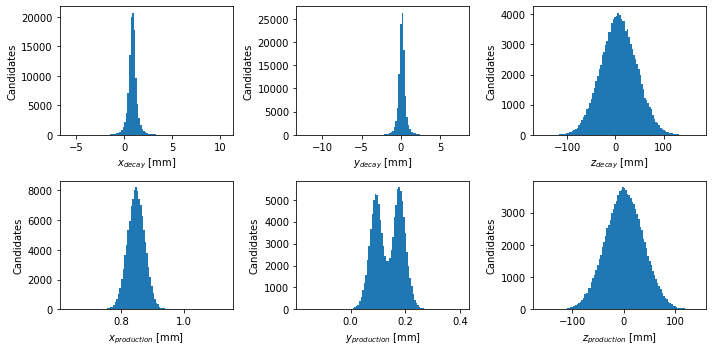

In [4]:
## plot the position of the D0 production and decay verticies
fig, ax = plt.subplots(2, 3, figsize=(10,5))
ax[0,0].hist(D0_X,bins=100)
ax[0,0].set_xlabel('$x_{decay}$ [mm]')
ax[0,0].set_ylabel('Candidates')

ax[0,1].hist(D0_Y,bins=100)
ax[0,1].set_xlabel('$y_{decay}$ [mm]')
ax[0,1].set_ylabel('Candidates')

ax[0,2].hist(D0_Z,bins=100)
ax[0,2].set_xlabel('$z_{decay}$ [mm]')
ax[0,2].set_ylabel('Candidates')

ax[1,0].hist(PV_X,bins=100)
ax[1,0].set_xlabel('$x_{production}$ [mm]')
ax[1,0].set_ylabel('Candidates')

ax[1,1].hist(PV_Y,bins=100)
ax[1,1].set_xlabel('$y_{production}$ [mm]')
ax[1,1].set_ylabel('Candidates')

ax[1,2].hist(PV_Z,bins=100)
ax[1,2].set_xlabel('$z_{production}$ [mm]')
ax[1,2].set_ylabel('Candidates')

plt.tight_layout()
plt.show()

## Part 2: Creating the information we'll need

The data set contains the three components of momentum  of the kaon and pion, and the positions of their vertex and the proton-proton interaction vertex. From this we will need to create the information we need: the mass and decay time of the $D^0$ candidate.  

### Part 2a: $D^0$ mass
The data contains the 3-momenta of the kaon and pion:
$$
\vec{\mathbf{p}} = (p_{x},p_{y},p_{z})
$$
We need the 4-momenta, which means adding the energy of the particles as well. At the LHCb experiment we don't measure the particle energy directly. Instead we use particle identification detectors to determine what type of particle the various the long-lived particles are (e.g. kaons or pions) and use the externally measured values of their masses and our measured momentums to compute the energy.
Values of the pion and kaon masses have been measured elsewhere:
- $m(\pi) = 139.6\,{\rm MeV}/c^{2}$
- $m(K) = 493.7\,{\rm MeV}/c^{2}$ 

<span style="color:red">**Task 1:** *[2 marks]*</span> Create new variables called `K_E` and `Pi_E` in which you calculate the pion and kaon energies from the 3-momenta and their known masses.

In [5]:
# Pi_E = 
# K_E = 

Now we have the pion and kaon energies we have the complete 4-momentum for the kaon and pion

$$ 
\mathbf{p}_{\pi} = \left[E_\pi,p_{x}(\pi),p_{y}(\pi),p_{z}(\pi)\right]
$$
$$
\mathbf{p}_{K} = \left[E(K),p_{x}(K),p_{y}(K),p_{z}(K)\right]
$$
we can use these to calculate the mass of the $D^0$ meson candidate. 

<span style="color:red">**Task 2:** *[2 marks]*</span> Calculate the $D^0$ mass using the all of the components of the kaon and pion 4-momentum. 

In [6]:
## D0_M = 

Our sample contains both real $D^0\to K \pi$ decays as well as backgrounds from combinations of a kaon and pion that didn't originate from a $D^0$ meson. A loose set of requirements have already been applied to the sample we are analysing to reduce the number of background candidates, whilst keeping most of the real $D^0\to K \pi$ decays.
These two different contributions will be easy to see if you've calculated the $D^0$ mass correctly. Hint: the mass of the $D^0$ meson is $1864.84\pm0.05\,{\rm MeV}/c^2$. 

<span style="color:red">**Task 3:** *[2 marks]*</span> Create a histogram of the $D^0$ mass.

In [7]:
## Plot D0_M histogram

### Part 2b: $D^0$ lifetime
To calculate the lifetime we first need to determine the distance between the proton-proton interaction vertex ($D^0$ production vertex, or primary vertex) and the $D^0$ decay vertex (or secondary vertex). The 3-vector between these points is given by:
$$
\Delta\vec{x} = \vec{x}_{\rm decay} - \vec{x}_{\rm production}.
$$
Note, both the production and decay positions are given in units of $\rm mm$. 

<span style="color:red">**Task 4:** *[4 marks]*</span> Calculate and plot a histgram of the absolute distance $|\Delta\vec{x}|$ between the primary vertex (proton-proton collision) and secondary vertex ($D^0$ decay).

In [8]:
# D0_L = 

In [9]:
## Plot D0_L histogram

In the lab frame, a particle travelling at velocity $\vec{\mathbf{v}}$ for a time $t$ will travel a distance $\Delta \vec{\mathbf{x}}$:
$$
\Delta\vec{\mathbf{x}} = \vec{\mathbf{v}}t
$$

We must account for special relativity when trying to determine the lifetime of the $D^0$ meson. We can rewrite this equation using relations between the momentum and velocity, and between lab frame time and proper time:

$$
\vec{\mathbf{p}} = \gamma m \vec{\mathbf{v}}
$$

$$
t = \gamma \tau.
$$

<span style="color:red">**Task 5** *[2 marks]*</span> Derive an experession for the decay time $\tau$ in terms of $\Delta\vec{\mathbf{x}}$, $\vec{\mathbf{p}}$, and $m$.

If we use $\vec{\mathbf{p}}$ in units of $[{\rm MeV}]$, $m$ in units of $[{\rm MeV}]$ and $\Delta\vec{\mathbf{x}}$ in units of $[\rm mm]$, the proper time $\tau$ will be calculated in units of $[\rm mm]$ (i.e. it's actually a length. This is because we are using natural units for the momentum and mass but SI units for the positions). 

We can convert $[\rm mm]$ into $[\rm ps]$ by dividing  by the speed of light in units of $[\rm mm \,ps^{-1}]$ (given at the top of the script).

<span style="color:red">**Task 6** *[5 marks]*</span> Calculate and plot a histgram of the proper time $\tau$ in units of picoseconds. *Hint: you'll need to create arrays containing the $D^0$ total momentum and $p_{x}$, $p_{y}$ and $p_{z}$ components.*

In [10]:
# Calculate tau [ps]
# Plot histogram of tau

### Part 3: Background subtraction

You should be able to see from your histogram of the $D^0$ mass that there is a component that is flat as a function of $m_{D^0}$ and a contribution that looks like a Gaussian. The Gaussian is our signal and the flat contribution is from background. This can be random combinations of kaons and pions that happen to have a $D^0$ mass within the mass window we've selected. These background decays may not have the same decay time distribution as our signal, so we must subtract the distribution of the background from our signal when plotting histograms of the decay time. 

There are a number of ways to perform background subtraction, we will use a simple method, as in our case the background distribution is very flat. 
- First, we will define a signal region. This could be $\pm 20\,{\rm MeV}$ around the known $D^0$ mass $1844.84<m_{D^0}<1884.84\,{\rm MeV}$.

- Second, we will define *two* background-only regions, each $ 20\,{\rm MeV}$ wide.
    - e.g. $1820<m_{D^0}<1840\,{\rm MeV}$ and  $1890<m_{D^0}<1910\,{\rm MeV}$

- Then if we plot a histogram of data in the signal region, and subtract a histogram of data in the two background-only regions we should end up with just the signal contribution. (This works because the width of the two background regions sums up to the same as the signal region and should cancel out the corresponding background decays) 

To plot a histogram of only a subset of the data we can use a mask. 
An example is shown below for momentum.


In [11]:
## Example of using masks to only plot a subset of data

if False:
    # Define some signal and background regions
    # Note- these are just for demonstration purposes
    signal_mask     = (D0_PX>-10000)&(D0_PX<10000)
    background_mask = (D0_PX<-10000)|(D0_PX>10000)

    fig, ax = plt.subplots(1,2,figsize=(10,5))

    ## We must use the same range for both so the correct values are subtracted
    hist_sig = ax[0].hist(D0_PY[signal_mask] ,    bins=50, range = (-20000,20000)) 
    hist_bkg = ax[0].hist(D0_PY[background_mask] ,bins=50, range = (-20000,20000))
    ax[0].set_yscale('log')


    ## Define a function to create the difference of two histograms
    def subtractHitograms(hist_sig,hist_bkg):
        val_of_bins_sig, edges_of_bins_sig, _ = hist_sig
        val_of_bins_bkg, edges_of_bins_bkg, _ = hist_bkg

        difference = val_of_bins_sig - val_of_bins_bkg
        ## Using possion statistics the error on each bin is sqrt(N)
        ## So we add sqrt(N_sig) and sqrt(N_bkg) in quaderature 
        error      = np.sqrt(val_of_bins_sig + val_of_bins_bkg,where=(val_of_bins_sig+val_of_bins_bkg >= 0))
        bincenter  = 0.5 * (edges_of_bins_sig[1:] + edges_of_bins_sig[:-1])
        return difference,error,bincenter

    ## Plot the difference between two histograms
    difference,error,bincenter = subtractHitograms(hist_sig,hist_bkg)
    ax[1].errorbar(bincenter, difference, yerr=error, color='r')
    ax[1].set_yscale('log')
    plt.show()


<span style="color:red">**Task 7** *[5 marks]*</span> Plot histograms of the $D^0$ decay time in the signal and background-only regions. Take the difference between the histograms to create the background-subtracted decaytime distribution. 

In [12]:
## Define signal and background masks

## Plot total, background and background-subtracted tau distributions  

### Part 4: Fit the decay time distribution to determine the $D^0$ lifetime 

The $D^0$ lifetime is a similar concept to the half life of a radioactive isotope. After one lifetime, on average, a certain fraction of the original sample will have decayed. Like radioactive decay, this means the decay time distribution ($\tau$) will follow an falling exponential, with the exponential slope given by the lifetime $\tau_{D^0}$
$$
\mathcal{P}(\tau) = N \exp{\left(-\frac{\tau}{\tau_{D^0}}\right)},
$$
where $N$ is a normalisation factor.
We want to fit our background-subtracted distribution to determine the lifetime.

An example fit is given below. 
 

Think about:
- What range of decay times should you include in you histogram?
- Why might the distribution not look purely exponential at small decay times? 

<span style="color:red">**Task 8** *[5 marks]*</span> Fit your decay time distribution to determine an estimate for the $D^0$ meson lifetime and an error. How does this compare to the known values? Use the [Particle Data Group](https://pdglive.lbl.gov/) value as a reference. What systematic sources of uncertainty might contribute in addition to the statistical uncertainty on your measurement?


In [13]:
from lmfit import fit_report
from scipy import stats
from monashspa.common.fitting import linear_fit, get_fit_parameters, make_lmfit_model, model_fit
from monashspa.common.figures import savefig

if False:
    ## Fill these with the contents of your background-subtracted distrbution
    x_values = []
    y_values = []
    y_errors = []

    ## Define a model to fit and set the parameters
    name        ='Decay time'
    model       = make_lmfit_model("a*sin(x/b)")
    params      = model.make_params(a=1.0, b=1.0)
    fit_results = model_fit(model, params, x_values, y_values, u_y=y_errors)

    # Extract result and print nicely
    fit            = fit_results.best_fit
    u_fit          = fit_results.eval_uncertainty(sigma=1)
    fit_parameters = get_fit_parameters(fit_results)
    pvalue         = 1.0 - stats.chi2.cdf(fit_results.chisqr,
                                      fit_results.ndata-fit_results.nvarys)

    ## Plot the result

    print("""
    [[{name}]]
    =================
      p-value       = {pvalue:.2E}
    """.format(name=name, pvalue=pvalue))
    print(fit_results.fit_report())

    # Create some plots
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    ax1.errorbar(    x_values, y_values, 
                     yerr=y_errors, 
                     marker="x", 
                     linestyle="None", 
                     color="black",
                     label=name)

    ax1.plot(        x_values, fit, 
                     marker="None", 
                     linestyle="-", 
                     color="black",
                     label="fit to {name}".format(name=name))

    ax1.fill_between(x_values, fit-u_fit, fit+u_fit,
                     color="lightgrey",
                     label="uncertainty in {name}".format(name=name))
    ax1.legend()
    ax1.set(ylabel="Background-subtracted candidates")
    ax1.set_yscale('log')

    ## Plot the pulls
    pull = (y_values-fit)/y_errors
    ax2.plot(x_values, pull, marker="*", linestyle="None", color="black")
    emin = np.min(x_values)
    emax = np.max(x_values)
    ax2.plot([emin, emax], [ 0, 0], marker="None", linestyle="-", color="grey")
    ax2.plot([emin, emax], [ 1, 1], marker="None", linestyle="dashed", color="grey")
    ax2.plot([emin, emax], [-1,-1], marker="None", linestyle="dashed", color="grey")
    ax2.set(xlabel="x", ylabel="Pull")
    scale = 1.1*np.max(np.abs(pull))
    ax2.set_ylim(-scale, scale)
    fig.suptitle('Fit with {name}'.format(name=name))

    plt.show()